In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

sys.path.insert(0, os.path.join("..", "..", "..", "estimators"))

from entropy_estimators import mi

plt.rc("text", usetex=True)

In [2]:
n_list = [50, 100, 200, 500]
n_iter = 10_000 #100_000

rho = 0.8
mu = np.zeros(2)
sigma = np.array([[1, rho], [rho, 1]])

In [3]:
mi_true = - 0.5 * np.log2(1-rho**2)

In [4]:
mis_list = []
for n in n_list:

    mis = []
    for _ in tqdm(range(n_iter)):
    
        data = np.random.multivariate_normal(mu, sigma, size=n)
        mis.append(
            mi(data[:, 0], data[:, 1])
        )

    mis_list.append(mis)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:16<00:00, 603.03it/s]


In [5]:
means_list = []
stds_list = []
for mis in mis_list:
    means_list.append(
        np.mean(mis)
    )
    stds_list.append(
        np.std(mis)
    )

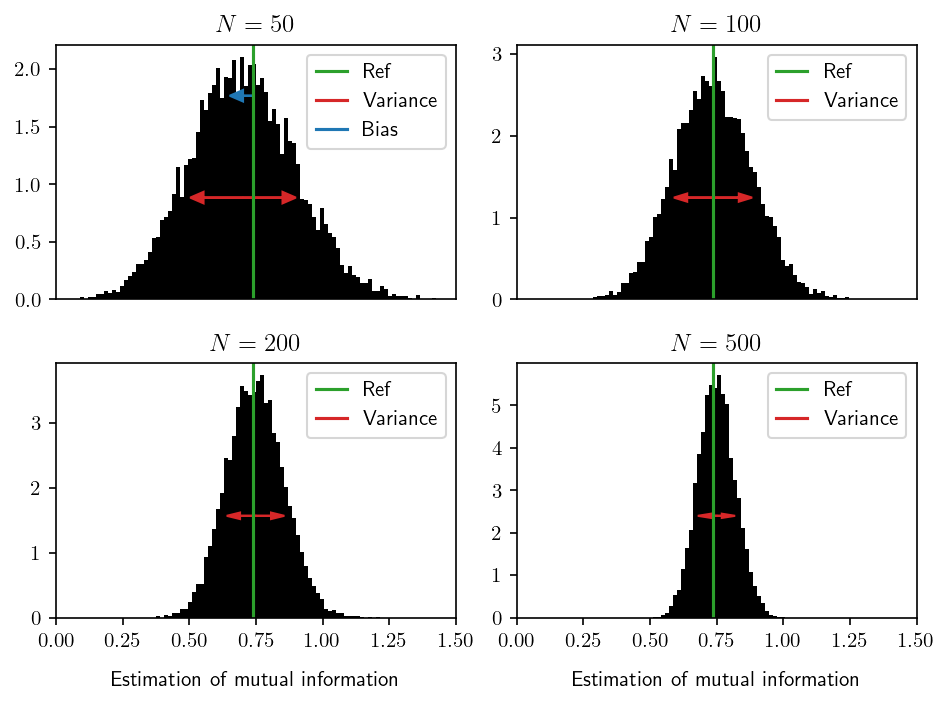

In [6]:
fig, axs = plt.subplots(2, 2, dpi=150)
axs = axs.flatten()

rg = [0, 1.5]
# rg = [mi_true - 0.75, mi_true + 0.75]

for k, n in enumerate(n_list):

    axs[k].hist(mis_list[k], color="black", bins=100, density=True, range=rg)
    axs[k].axvline(mi_true, color="tab:green", label="Ref")

    axs[k].set_title(f"$N = {n}$")

    if k in [0, 1]:
        axs[k].set_xticks([])
    if k in [2, 3]:
        axs[k].set_xlabel("Estimation of mutual information", labelpad=10)

    ymax = axs[k].get_ylim()[1]

    if k in [0, 1, 2, 3]:
        axs[k].arrow(
            means_list[k], 0.4*ymax, stds_list[k], 0.,
            head_width=0.1, head_length=0.05,
            length_includes_head=True, clip_on=False,
            color="tab:red"
        )

        axs[k].arrow(
            means_list[k], 0.4*ymax, -stds_list[k], 0.,
            head_width=0.1, head_length=0.05,
            length_includes_head=True, clip_on=False,
            color="tab:red"
        )

        axs[k].plot([], [], color="tab:red", label="Variance")

    if k in [0]:
        axs[k].arrow(
            mi_true, 0.8*ymax, means_list[k]-mi_true, 0.,
            head_width=0.1, head_length=0.05,
            length_includes_head=False, clip_on=False,
            color="tab:blue"
        )

        axs[k].plot([], [], color="tab:blue", label="Bias")

    axs[k].set_xlim(rg)

    axs[k].legend(
        handlelength=1.5
    )

plt.tight_layout()

plt.savefig("hist-var.png")
plt.show()